In [ ]:
# For detailed script Please visit  https://github.com/sukantjain/Python/blob/main/NetCDF_to_CSV.ipynb

In [1]:
import xarray
import pandas as pd
import numpy as np

In [68]:
netcdf1 = xarray.open_dataset(r'D:\NIH\Training\Python for water\NWA\data\IMD\RF25_ind2020_rfp25.nc')

netcdf1

<xarray.Dataset> Size: 51MB
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 366)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 51MB ...
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

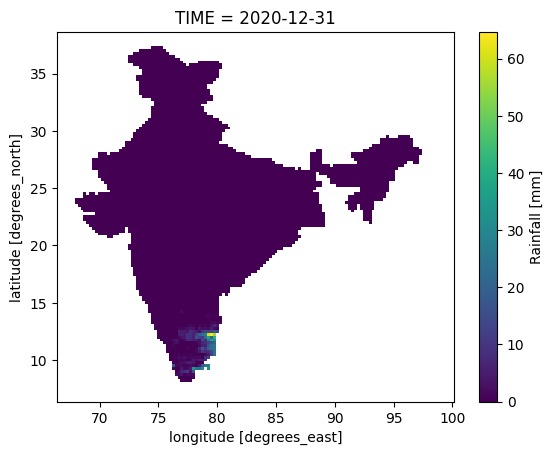

In [69]:
arr_lat = np.array(netcdf1['LATITUDE'])
arr_lon = np.array(netcdf1['LONGITUDE'])
arr_time = np.array(netcdf1['TIME'])

var_arr = netcdf1['RAINFALL']
var_arr[-1,:,:].plot()


In [71]:
user_lat = 23.21
user_lon = 77.40

closest_index_lat = np.argmin(np.abs(arr_lat-user_lat))
closest_index_lon = np.argmin(np.abs(arr_lon-user_lon))

closest_lat = arr_lat[closest_index_lat]
closest_lon = arr_lon[closest_index_lon]

name = str(closest_lat) + "_" + str(closest_lon)

arr_loc = var_arr[:,closest_index_lat,closest_index_lon]
df = pd.DataFrame({name:arr_loc}, index=arr_time)

df

,23.25_77.5
2020-01-01,0.000000
2020-01-02,1.103457
2020-01-03,0.000000
2020-01-04,0.000000
2020-01-05,0.000000
...,...
2020-12-27,0.000000
2020-12-28,0.000000
2020-12-29,0.000000
2020-12-30,0.000000
